## hairstyle transfer

https://github.com/subrtade662/hairstyle_transfer

In [1]:
!git clone https://github.com/subrtade662/hairstyle_transfer.git
%cd hairstyle_transfer

Cloning into 'hairstyle_transfer'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 49 (delta 15), reused 31 (delta 8), pack-reused 0
Unpacking objects: 100% (49/49), done.
Checking connectivity... done.
/home/aiku/AIKU/hair/hairstyle_transfer


In [ ]:
!pip install -r requirements2.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.3/28.3 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.1/108.1 KB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face_alignment: filename=face_alignment-1.3.5-py2.py3-none-any.whl size=28242 sha256=c2fef50c3f03214db8413e457e37be3effd98e5e59f6c1816ac6f8cef761aff5
  Stored in directory: /root/.cache/pip/wheels/32/21/d8/7bf61c86e3a6c5af8f118708d4c9c26512dbd1c913a0b97c8a
Successfully built face_alignment
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.6.0.66
    Uninstalling opencv-python-4.6.0.66:
      Successfully uninstalled opencv-python-4.6.0.66


In [1]:
import os
import torch
from PIL import Image

In [ ]:
os.mkdir('exp')

In [ ]:
# source image(사용자 이미지)
img1 = Image.open('/content/drive/MyDrive/Colab Notebooks/AIKU/new_input_ffhq/source3.png')
# img1 = img1.resize((1024, 1024))
img1.save('exp/source.png')

In [ ]:
# target image(헤어스타일 이미지)
img2 = Image.open('/content/drive/MyDrive/Colab Notebooks/AIKU/new_input_ffhq/target7.png')
# img2 = img2.resize((1024, 1024))
img2.save('exp/target.png')

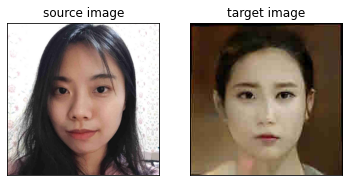

In [5]:
import matplotlib.pyplot as plt

# os.chdir('/content/Style-Your-Hair')

img1 = Image.open('exp/source.png')
img2 = Image.open('exp/target.png')

imgs = [img1, img2]
for i in range(2) : 
    image_index = i + 1
    plt.subplot(1, 2, image_index) # subplot 
    if i == 0:
      plt.title('source image')
    else:
      plt.title('target image')
    plt.xticks([])  # x = None 
    plt.yticks([])  # y = None
    plt.imshow(imgs[i])
plt.show()

In [ ]:
from requests import get  # to make GET request

def download(url, file_name = None):
	if not file_name:
		file_name = url.split('/')[-1]

	with open(file_name, "wb") as file:   
        	response = get(url)               
        	file.write(response.content)      

if __name__ == '__main__':
	url = "http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2"
	download(url)

In [ ]:
import bz2

with bz2.open("shape_predictor_68_face_landmarks.dat.bz2", "rb") as f:
    # Decompress data from file
    shape_predictor = f.read()

In [ ]:
with open('shape_predictor_68_face_landmarks.dat', 'wb') as f:  
    f.write(shape_predictor)
    
os.remove('shape_predictor_68_face_landmarks.dat.bz2')

In [ ]:
model = torch.load("/content/drive/MyDrive/Colab Notebooks/AIKU/best_model.pt")
torch.save(model, "best_model.pt")

In [3]:
%cd hairstyle_transfer

/home/aiku/AIKU/hair/hairstyle_transfer


In [4]:
!python inference.py --output_path /exp/ \
--mode transfer \
--source ./exp/target.png \
--target ./exp/source.png \
--alpha_blend

Downloading: "https://www.adrianbulat.com/downloads/python-fan/2DFAN4-cd938726ad.zip" to /home/aiku/.cache/torch/hub/checkpoints/2DFAN4-cd938726ad.zip
100%|██████████████████████████████████████| 91.9M/91.9M [00:11<00:00, 8.04MB/s]
{'path': '/exp/', 'mode': 'transfer', 'source': './exp/target.png', 'target': './exp/source.png', 'alpha_blend': True, 'n_steps_interp': None, 'face_interp': False, 'manip_attribute': None, 'manip_strength': None}
All done
Using BackboneEncoderUsingLastLayerIntoWPlus
Using BackboneEncoderUsingLastLayerIntoWPlus
Loading pSp from checkpoint: ./best_model.pt
Number of faces detected: 1
Detection 0: Left: 46 Top: 81 Right: 201 Bottom: 236
Part 0: (56, 125), Part 1: (58, 143) ...
Lossy conversion from float64 to uint8. Range [0.0, 228.0]. Convert image to uint8 prior to saving to suppress this warning.
Number of faces detected: 1
Detection 0: Left: 171 Top: 233 Right: 726 Bottom: 788
Part 0: (226, 421), Part 1: (227, 483) ...
Lossy conversion from float64 to uint

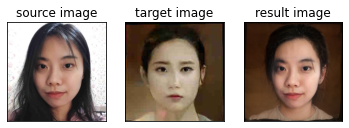

<Figure size 432x576 with 0 Axes>

In [6]:
img3 = Image.open('./data/results/target_source_blend_True.jpg')
imgs = [img1, img2, img3]

for i in range(3) : 
    image_index = i + 1
    plt.subplot(1, 3, image_index) # subplot 
    if i == 0:
      plt.title('source image')
    elif i == 1:
      plt.title('target image')
    elif i == 2:
      plt.title('result image')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imgs[i])  
plt.figure(figsize=(6,8))
plt.show()